<a href="https://colab.research.google.com/github/sandeepgoku/EIP_Phase_4/blob/master/Copy_of_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


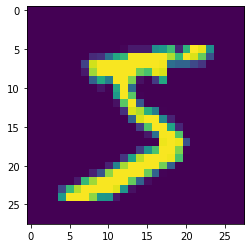

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3,activation='relu'))
model.add(Convolution2D(32, 3, 3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 11))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys


In [48]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 10)        330       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 1, 1, 10)          12110     
_________________________________________________________________
flatten_5 (Flatten)          (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [50]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=12, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/12
60000/60000 [==============================] - 20s 339us/step - loss: 0.1568 - acc: 0.9519
Epoch 2/12
60000/60000 [==============================] - 20s 336us/step - loss: 0.0583 - acc: 0.9822
Epoch 3/12
60000/60000 [==============================] - 20s 337us/step - loss: 0.0450 - acc: 0.9857
Epoch 4/12
60000/60000 [==============================] - 20s 335us/step - loss: 0.0365 - acc: 0.9886
Epoch 5/12
60000/60000 [==============================] - 20s 339us/step - loss: 0.0306 - acc: 0.9904
Epoch 6/12
60000/60000 [==============================] - 20s 335us/step - loss: 0.0245 - acc: 0.9921
Epoch 7/12
60000/60000 [==============================] - 20s 335us/step - loss: 0.0226 - acc: 0.9922
Epoch 8/12
60000/60000 [==============================] - 20s 340us/step - loss: 0.0195 - acc: 0.9936
Epoch 9/12
60000/60000 [==============================] - 20s 337us/step - loss: 0.0157 - acc: 0.9946
Epoch 10/12
60000/60000 [==============================] - 20s 335us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [52]:
print(score)

[0.03702583048704128, 0.9901]


In [0]:
y_pred = model.predict(X_test)

In [54]:
print(y_pred[:9])
print(y_test[:9])

[[2.0748548e-18 9.7600754e-17 3.8727854e-10 5.5527826e-13 1.4169875e-16
  3.0282864e-13 2.6285020e-25 1.0000000e+00 6.9332582e-13 3.6221440e-10]
 [2.1635700e-10 1.3351386e-09 1.0000000e+00 1.9630277e-15 6.1830234e-16
  4.4222745e-19 9.6626849e-09 2.9484618e-15 1.0825146e-11 1.8304072e-14]
 [7.8659159e-17 9.9999809e-01 2.0018554e-08 2.2910236e-11 7.9936223e-07
  3.1341994e-08 1.1528524e-10 1.0106678e-06 7.5871974e-08 8.6859731e-10]
 [9.9999952e-01 9.3710316e-18 9.6010588e-10 6.8721619e-14 2.1584000e-14
  8.6769689e-12 4.4160453e-07 2.1574237e-11 3.1955768e-11 3.4588246e-10]
 [5.1439963e-12 3.4680090e-13 3.0444067e-11 1.1912411e-14 9.9999988e-01
  2.3757836e-12 5.2650189e-12 1.0669358e-11 2.6760549e-09 1.5450435e-07]
 [5.1411220e-15 9.9996138e-01 8.7018099e-09 2.6737742e-12 1.7137013e-06
  3.8118165e-11 3.5835494e-14 3.6848491e-05 7.0094757e-08 5.0660098e-09]
 [2.7748717e-16 1.8888784e-10 1.5365262e-10 1.0498221e-14 9.9987221e-01
  6.4088668e-09 1.0554555e-11 7.3030315e-10 1.2720261e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [56]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored